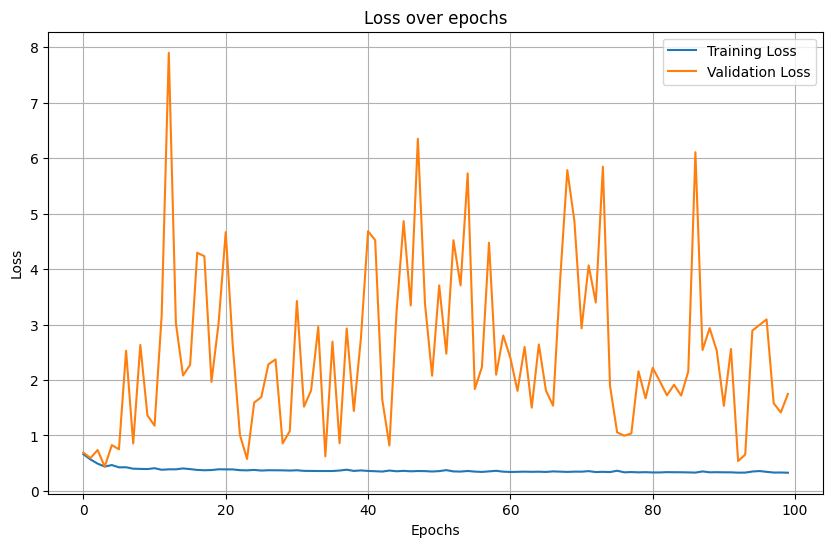

60/60 [==============================] - 0s 2ms/step - loss: 0.3501
Loss: 0.3501114547252655
60/60 [==============================] - 0s 2ms/step
Mean Squared Error: 1.7444277306316143e+21
R^2 Score: 0.6457197950316105


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, Nadam
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.layers import Dropout

# Cargar el dataset desde el archivo CSV
data = pd.read_csv('inmuebles_bogota.csv')  # Asegúrate de reemplazar 'inmuebles_bogota.csv' con el nombre correcto del archivo

data
# Eliminar filas con valores NaN
data = data.dropna()

# Convertir la columna 'Valor' de string a entero
data['Valor'] = data['Valor'].str.replace('[\$,]', '', regex=True)  # Eliminar caracteres especiales
data['Valor'] = data['Valor'].str.replace('\.', '', regex=True).astype(int)  # Eliminar puntos y convertir a entero

# Seleccionar las características y la variable objetivo
X = data[['Habitaciones', 'Baños', 'Área']]
y = data['Valor']

# Escalar las características
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Escalar la variable objetivo
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Inicializar el modelo
model = Sequential()

# Añadir capas densas
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(Dropout(0.2))  # Dropout del 20%
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Una neurona para salida con activación lineal

# Compilar el modelo
model.compile(Nadam(learning_rate=0.002), loss='mean_squared_error')

# Entrenar el modelo y guardar el historial de entrenamiento
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Graficar la pérdida durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')

# Predecir y evaluar el modelo
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

mse = mean_squared_error(y_test_inv, y_pred)
r2 = r2_score(y_test_inv, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


In [24]:
data

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,36000000000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,67000000000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,112000000000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,89000000000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,97000000000
...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,29000000000
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,67000000000
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,90000000000
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,33500000000
